In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import chi2


credit_card_data=pd.read_csv('default of credit card clients.csv')
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Check missing data Let's check if there is any missing data.

In [2]:
credit_card_data.describe()
check_null = credit_card_data.isnull().sum()
print(check_null)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


# Data unbalance Let's check data unbalance with respect with target value, i.e.

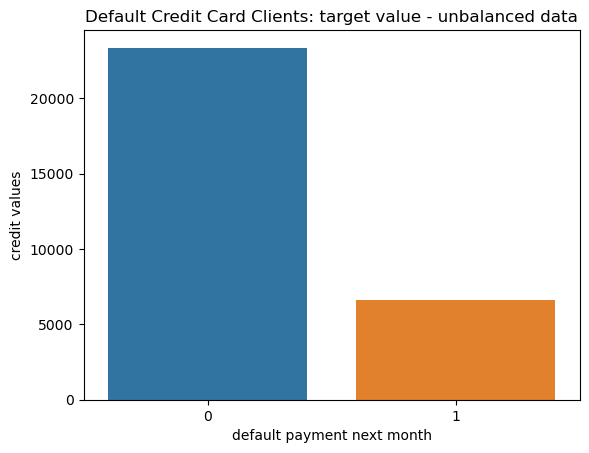

In [169]:
temp_var = credit_card_data["default payment next month"].value_counts()
target_var = pd.DataFrame({'default payment next month': temp_var.index,'credit values': temp_var.values})
plt.figure()
plt.title('Default Credit Card Clients: target value - unbalanced data')
sns.barplot(x = 'default payment next month', y="credit values", data=target_var)
plt.show()

# Marriage status, education level and credit amount limit

In [170]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=credit_card_data,showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

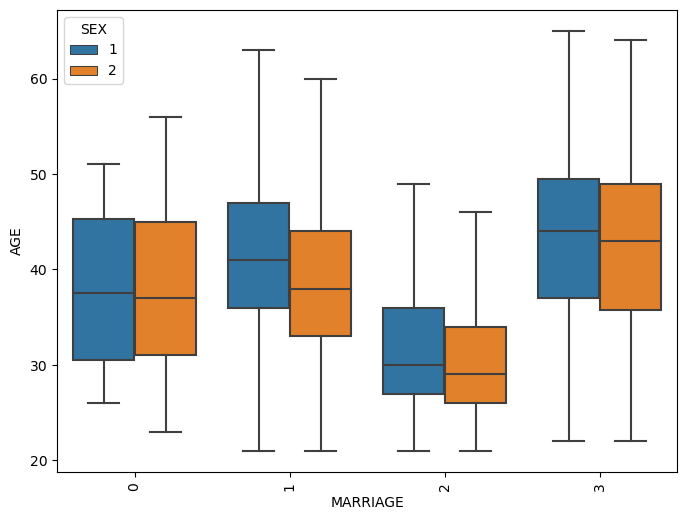

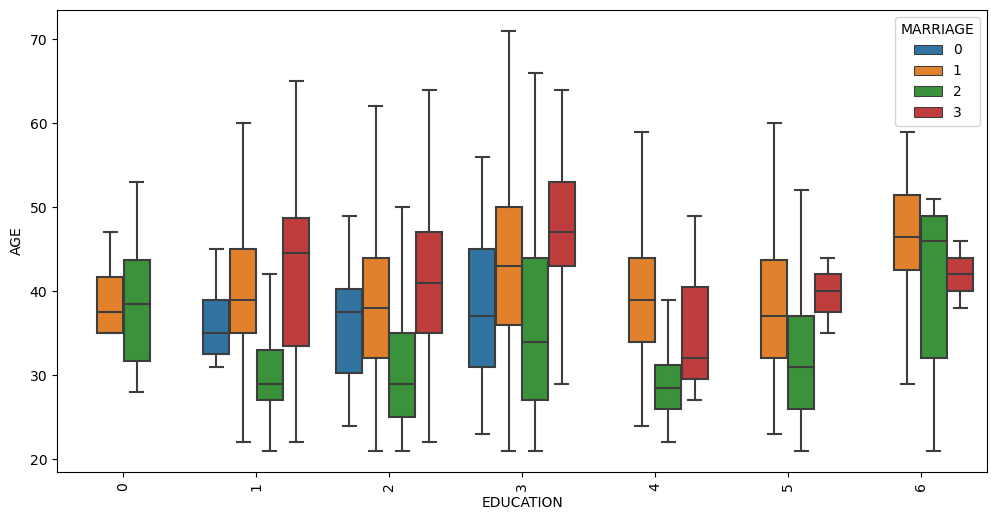

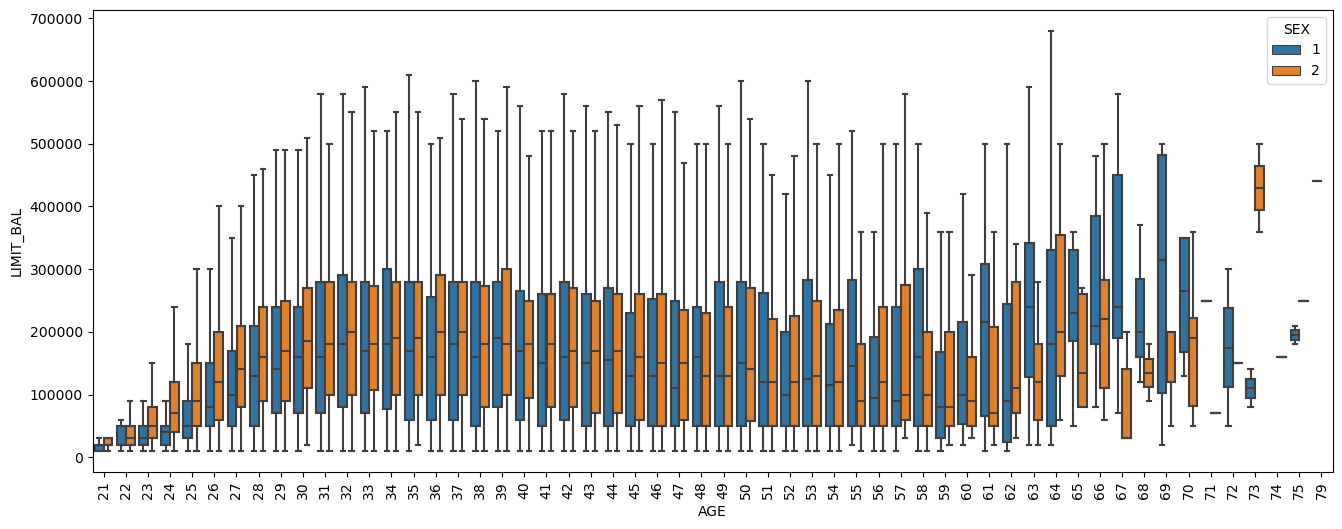

In [194]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)


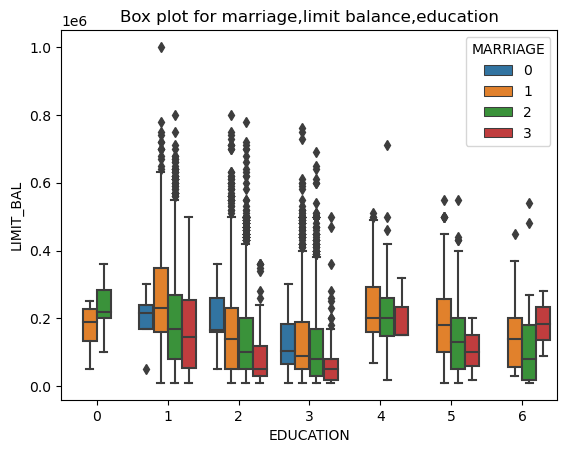

In [172]:
plt.figure()
plt.title('Box plot for marriage,limit balance,education')
sns.boxplot(data=credit_card_data, x="EDUCATION", y="LIMIT_BAL", hue="MARRIAGE")
plt.show()

# Data exploration Amount of credit limit

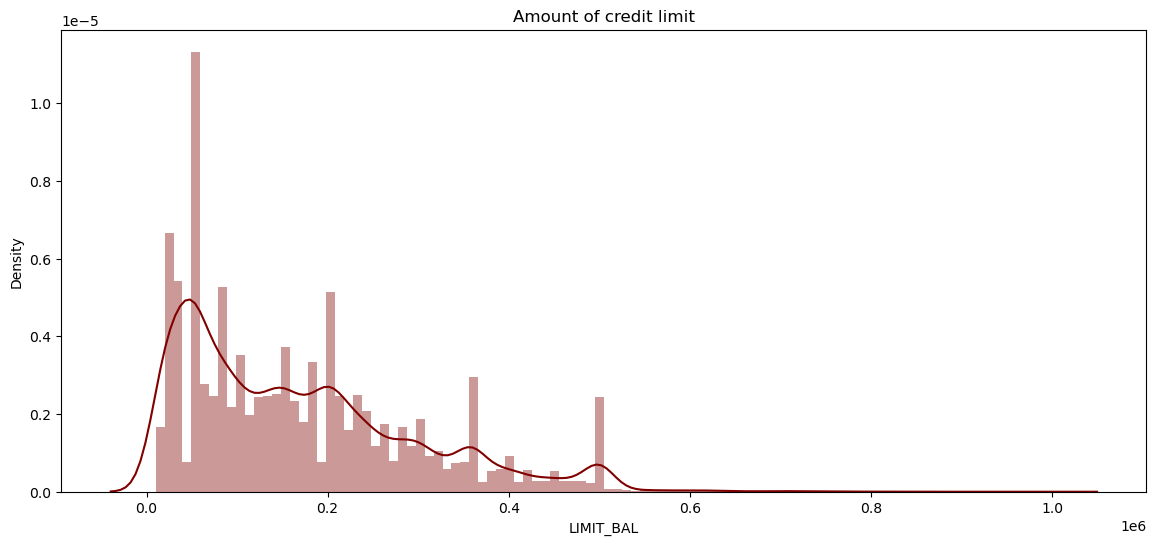

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
150000    1110
100000    1048
180000     995
360000     881
60000      825
Name: LIMIT_BAL, dtype: int64

In [173]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit')
sns.distplot(credit_card_data['LIMIT_BAL'],kde=True,bins=100, color="maroon")
plt.show()

credit_card_data['LIMIT_BAL'].value_counts().head(10)

# Amount of credit limit grouped by default payment next month

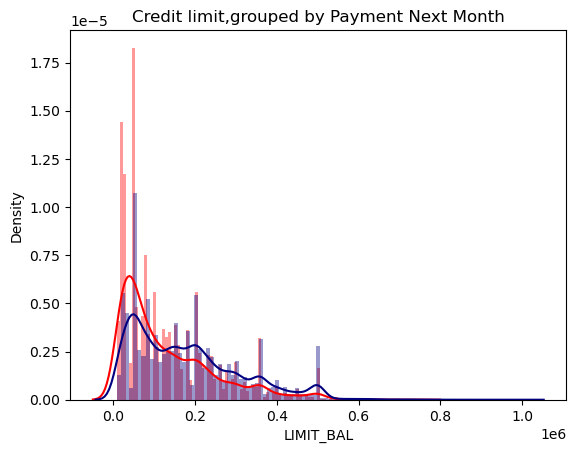

In [174]:
target_0 = credit_card_data.loc[credit_card_data['default payment next month'] == 0]["LIMIT_BAL"]
target_1 = credit_card_data.loc[credit_card_data['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure()
plt.title('Credit limit,grouped by Payment Next Month')
sns.distplot(target_1,kde=True,bins=100,color='red')
sns.distplot(target_0,kde=True,bins=100,color='navy')
plt.show()

# *Credit limit vs. sex

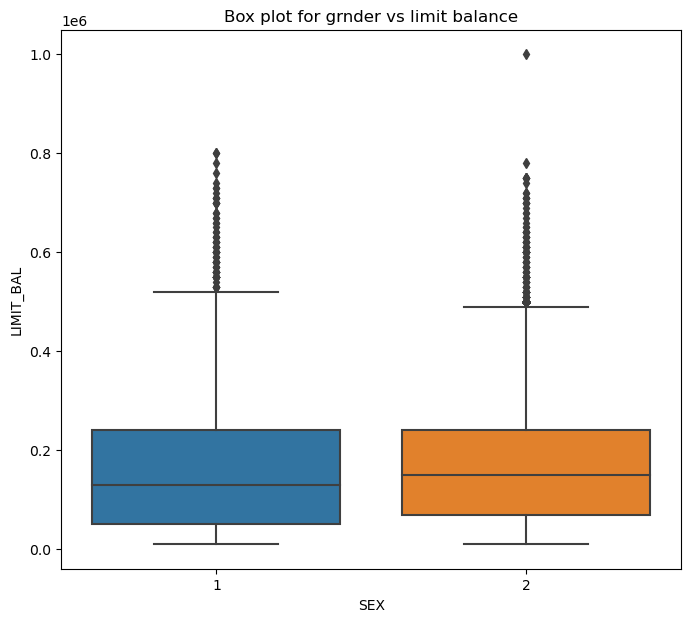

In [191]:
plt.figure(figsize =(8,7))
plt.title('Box plot for grnder vs limit balance')
sns.boxplot(data=credit_card_data, x="SEX", y="LIMIT_BAL")
plt.show()

# Features correlation



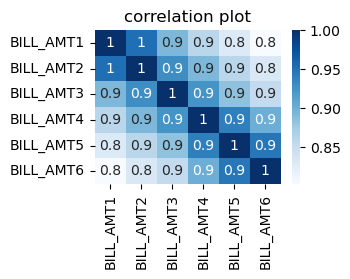

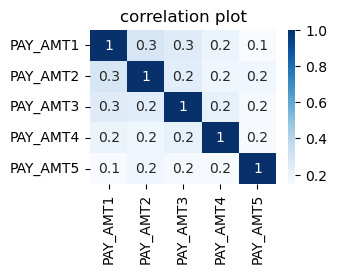

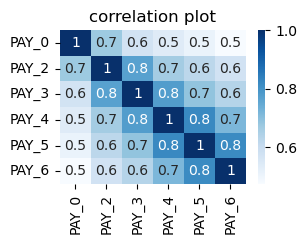

In [176]:
BILL_AMT = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
PAY_AMT = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
PAY = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


def correlation_var(feature1):
    fig, ax1 = plt.subplots(figsize=(3,2))
    plt.title('correlation plot')
    correlation = credit_card_data[feature1].corr()
    heatmap = sns.heatmap(correlation, annot=True, cmap="Blues", fmt='.1g')
    plt.show();
    
correlation_var(BILL_AMT)    
correlation_var(PAY_AMT)
correlation_var(PAY)


# balancing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37354 entries, 0 to 37353
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default payment next month  37354 non-null  int64
 1   ID                          37354 non-null  int64
 2   LIMIT_BAL                   37354 non-null  int64
 3   SEX                         37354 non-null  int64
 4   EDUCATION                   37354 non-null  int64
 5   MARRIAGE                    37354 non-null  int64
 6   AGE                         37354 non-null  int64
 7   PAY_0                       37354 non-null  int64
 8   PAY_2                       37354 non-null  int64
 9   PAY_3                       37354 non-null  int64
 10  PAY_4                       37354 non-null  int64
 11  PAY_5                       37354 non-null  int64
 12  PAY_6                       37354 non-null  int64
 13  BILL_AMT1                   37354 non-null  int64
 14  BILL_A

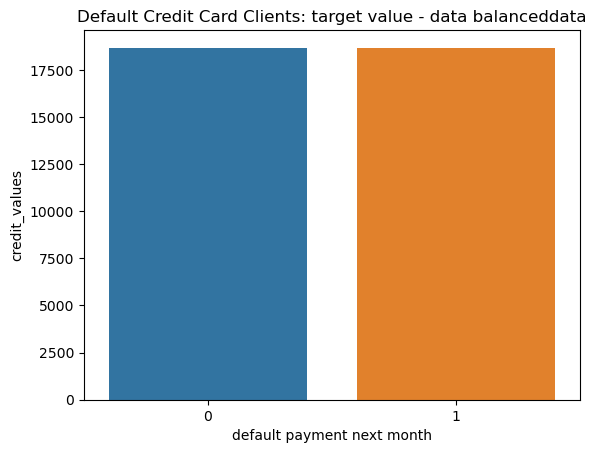

In [6]:
X = credit_card_data.drop(['default payment next month'], axis=1)
y = credit_card_data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote_data = SMOTE(sampling_strategy='minority', random_state=30)
over_sampled_X, over_sampled_Y = smote_data.fit_resample(X_train,y_train)
final_sampled_data = pd.concat([pd.DataFrame(over_sampled_Y), pd.DataFrame(over_sampled_X)], axis=1)
print(final_sampled_data.info())
print(over_sampled_Y.value_counts())

temp_var = final_sampled_data["default payment next month"].value_counts()
target_var = pd.DataFrame({'default payment next month': temp_var.index,'credit_values': temp_var.values})
plt.figure()
plt.title('Default Credit Card Clients: target value - data balanceddata')
sns.barplot(x = 'default payment next month', y="credit_values", data=target_var)
plt.show()

# predictions for imbalanced data 

In [151]:
X = credit_card_data.drop(['default payment next month'], axis=1)
y = credit_card_data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


extra_tree_model = ExtraTreesClassifier()
extra_tree_model.fit(X_train_scaled, y_train)
extra_tree_pred = extra_tree_model.predict(X_test_scaled)
print("Extra Trees Classifier:")
print("Accuracy:", accuracy_score(y_test, extra_tree_pred))
print("Precision:", precision_score(y_test, extra_tree_pred))
print("Recall:", recall_score(y_test, extra_tree_pred))
print("F1-score:", f1_score(y_test, extra_tree_pred))


random_f_model = RandomForestClassifier()
random_f_model.fit(X_train_scaled, y_train)
random_f_pred = random_f_model.predict(X_test_scaled)
print("RandomForestClassifier:")
print("Accuracy:", accuracy_score(y_test, random_f_pred))
print("Precision:", precision_score(y_test, random_f_pred))
print("Recall:", recall_score(y_test, random_f_pred))
print("F1-score:", f1_score(y_test, random_f_pred))


lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("LogisticRegression :")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("KNeighborsClassifier:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1-score:", f1_score(y_test, knn_pred))

Extra Trees Classifier:
Accuracy: 0.8133333333333334
Precision: 0.6271409749670619
Recall: 0.3625285605483625
F1-score: 0.4594594594594595
RandomForestClassifier:
Accuracy: 0.8163333333333334
Precision: 0.6427604871447903
Recall: 0.3617669459253618
F1-score: 0.46296296296296297
LogisticRegression :
Accuracy: 0.81
Precision: 0.6935123042505593
Recall: 0.2361005331302361
F1-score: 0.3522727272727273
KNeighborsClassifier:
Accuracy: 0.7953333333333333
Precision: 0.5508982035928144
Recall: 0.3503427265803503
F1-score: 0.4283054003724394


# prediction for balanced data

In [152]:
X = final_sampled_data.drop(['default payment next month'], axis=1)
y = final_sampled_data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




extra_tree_model = ExtraTreesClassifier()
extra_tree_model.fit(X_train_scaled, y_train)
extra_tree_pred = extra_tree_model.predict(X_test_scaled)
print("Extra Trees Classifier:")
print("Accuracy:", accuracy_score(y_test, extra_tree_pred))
print("Precision:", precision_score(y_test, extra_tree_pred))
print("Recall:", recall_score(y_test, extra_tree_pred))
print("F1-score:", f1_score(y_test, extra_tree_pred))


random_f_model = RandomForestClassifier()
random_f_model.fit(X_train_scaled, y_train)
random_f_pred = random_f_model.predict(X_test_scaled)
print("RandomForestClassifier:")
print("Accuracy:", accuracy_score(y_test, random_f_pred))
print("Precision:", precision_score(y_test, random_f_pred))
print("Recall:", recall_score(y_test, random_f_pred))
print("F1-score:", f1_score(y_test, random_f_pred))


lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("LogisticRegression :")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("KNeighborsClassifier:")
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred))
print("Recall:", recall_score(y_test, knn_pred))
print("F1-score:", f1_score(y_test, knn_pred))

Extra Trees Classifier:
Accuracy: 0.8452683710346673
Precision: 0.8605233853006682
Recall: 0.8251468232781634
F1-score: 0.842463886617607
RandomForestClassifier:
Accuracy: 0.8479453888368358
Precision: 0.865546218487395
Recall: 0.8248798718633209
F1-score: 0.8447238928376163
LogisticRegression :
Accuracy: 0.7229286574755722
Precision: 0.7292122538293216
Recall: 0.7116924719701014
F1-score: 0.7203458524723048
KNeighborsClassifier:
Accuracy: 0.7633516262883148
Precision: 0.7479939819458375
Recall: 0.7963160704751735
F1-score: 0.7713990173260926


# SelectKbest feature selection

In [200]:
#feature = final_sampled_data.drop(['default payment next month'], axis=1)
features = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = final_sampled_data['default payment next month']

selector = SelectKBest(k=18)
selected_features_data = selector.fit_transform(final_sampled_data[features], target.values)
# print(selected_features_data.shape)
# print(selected_features_data)
# scores = selector.scores_[:10]
# print(scores)
# selected_features = selector.get_feature_names_out
# print(selected_features)
X_train, X_test, y_train, y_test = train_test_split(selected_features_data, target, test_size=0.3)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

(37354, 18)
[[ 80000      2      2 ...   1218   1445    878]
 [ 30000      1      2 ...    955      0      0]
 [180000      2      5 ...   6881  10340    182]
 ...
 [208122      1      1 ...   5237   7415   5219]
 [201854      1      2 ...   4796   4703   4703]
 [ 20000      1      2 ...    725    802    581]]
[1.42339402e+03 1.78686374e+03 3.77418247e+02 1.57575197e+03
 8.25718981e-01 5.01814025e+03 3.37589662e+03 2.63845807e+03
 2.31682979e+03 2.12234520e+03]
<bound method SelectorMixin.get_feature_names_out of SelectKBest(k=18)>
Random Forest Accuracy: 0.8293923440706701


# SelectKbest feature selection + (ExtraTreesClassifier,RandomForestClassifier)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#feature = final_sampled_data.drop(['default payment next month'], axis=1)
features = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = final_sampled_data['default payment next month']

selector = SelectKBest(k=18)
selected_features_data = selector.fit_transform(final_sampled_data[features], target.values)
# print(selected_features_data.shape)
# print(selected_features_data)
# scores = selector.scores_[:10]
# print(scores)
# selected_features = selector.get_feature_names_out
# print(selected_features)
X_train, X_test, y_train, y_test = train_test_split(selected_features_data, target, test_size=0.3)


extra_tree_model = ExtraTreesClassifier()
extra_tree_model.fit(X_train, y_train)
extra_tree_pred = extra_tree_model.predict(X_test)
print("SelectKbest feature + Extra Trees Classifier:")
print("Accuracy:", accuracy_score(y_test, extra_tree_pred))
print("Precision:", precision_score(y_test, extra_tree_pred))
print("Recall:", recall_score(y_test, extra_tree_pred))
print("F1-score:", f1_score(y_test, extra_tree_pred))


random_f_model = RandomForestClassifier()
random_f_model.fit(X_train, y_train)
random_f_pred = random_f_model.predict(X_test)
print("SelectKbest feature + RandomForestClassifier:")
print("Accuracy:", accuracy_score(y_test, random_f_pred))
print("Precision:", precision_score(y_test, random_f_pred))
print("Recall:", recall_score(y_test, random_f_pred))
print("F1-score:", f1_score(y_test, random_f_pred))

SelectKbest feature + Extra Trees Classifier:
Accuracy: 0.8309984830909253
Precision: 0.8440810258316298
Recall: 0.8115061640164374
F1-score: 0.8274731280743306
SelectKbest feature + RandomForestClassifier:
Accuracy: 0.8334969215668778
Precision: 0.8479761238574893
Recall: 0.8122208325888869
F1-score: 0.8297134513597372


# PCA + (LogisticRegression,KNeighborsClassifier)

PCA Explained Variance Ratio:
Component 1: 0.6319199365155906
Component 2: 0.28778035907813015
Component 3: 0.027259347140374587
Component 4: 0.014055980453156402
Component 5: 0.008131352232375648
Component 6: 0.007774835662659037
Component 7: 0.005944677089626547
Component 8: 0.005297819856734886
Component 9: 0.004596540188645636
Component 10: 0.0024896488847405353
Component 11: 0.001985978233516518
Component 12: 0.0014308431819818664
Component 13: 0.0013326795658042065
Component 14: 1.743708357953883e-09
Component 15: 1.0071871599749382e-10
Component 16: 2.0733178547157646e-11
Component 17: 1.2160950704785516e-11
Component 18: 1.124046758707925e-11


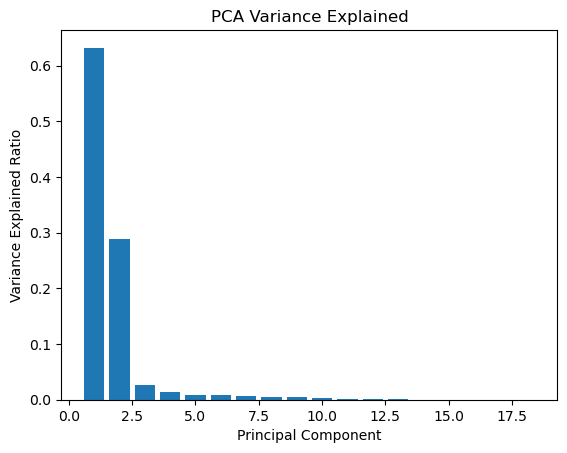

PCA + Logistic Regression Accuracy: 0.6129032258064516
PCA + Logistic Regression Precision: 0.5868945868945868
PCA + Logistic Regression Recall: 0.7698878804057662
PCA + Logistic Regression F1-score: 0.6660508083140877
PCA + KNN Accuracy: 0.7339044304644626
PCA + KNN Precision: 0.6891135972461274
PCA + KNN Recall: 0.8550453817405232
PCA + KNN F1-score: 0.7631641648796759


In [213]:

pca = PCA(n_components=18)
pca_selected_features_data = pca.fit_transform(final_sampled_data[features])
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_selected_features_data, target, test_size=0.2, random_state=42)

explained_variance_ratio = pca.explained_variance_ratio_

print("PCA Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio}")

    
component_numbers = np.arange(1, len(explained_variance_ratio)+1)
plt.bar(component_numbers, explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('PCA Variance Explained')
plt.show()


pca_lr_model = LogisticRegression()
pca_lr_model.fit(X_train_pca, y_train_pca)
pca_lr_predictions = pca_lr_model.predict(X_test_pca)
print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test_pca, pca_lr_predictions))
print("PCA + Logistic Regression Precision:", precision_score(y_test_pca, pca_lr_predictions))
print("PCA + Logistic Regression Recall:", recall_score(y_test_pca, pca_lr_predictions))
print("PCA + Logistic Regression F1-score:", f1_score(y_test_pca, pca_lr_predictions))


pca_KNN_model = KNeighborsClassifier()
pca_KNN_model.fit(X_train_pca, y_train_pca)
pca_KNN_predictions = pca_KNN_model.predict(X_test_pca)
print("PCA + KNN Accuracy:", accuracy_score(y_test_pca, pca_KNN_predictions))
print("PCA + KNN Precision:", precision_score(y_test_pca, pca_KNN_predictions))
print("PCA + KNN Recall:", recall_score(y_test_pca, pca_KNN_predictions))
print("PCA + KNN F1-score:", f1_score(y_test_pca, pca_KNN_predictions))


# hyper tunning for knn

In [185]:

X = final_sampled_data.drop(['default payment next month'], axis=1)
y = final_sampled_data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def knn_tuning(X_train_scaled, X_test_scaled, y_train, y_test):
    best_score = 0.0
    best_k = -1
    for k in range(2, 20):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train_scaled, y_train)
        knn_pred = knn_model.predict(X_test_scaled)
        score = recall_score(y_test, knn_pred)
        if score > best_score:
            best_k = k
            best_score = score
            print("best_k ",k," best_score ",score)
            print("Accuracy:", accuracy_score(y_test, knn_pred))
            print("Precision:", precision_score(y_test, knn_pred))
            print("Recall:", recall_score(y_test, knn_pred))
            print("F1-score:", f1_score(y_test, knn_pred))
      
            
knn_tuning(X_train_scaled, X_test_scaled, y_train, y_test)

best_k  2  best_score  0.6450239489089942
Accuracy: 0.7481038636566432
Precision: 0.8156123822341858
Recall: 0.6450239489089942
F1-score: 0.7203566121842496
best_k  3  best_score  0.7878304062444562
Accuracy: 0.7580083876148835
Precision: 0.7455094846399194
Recall: 0.7878304062444562
F1-score: 0.7660859065033637


# extra tree calssifier feature importance

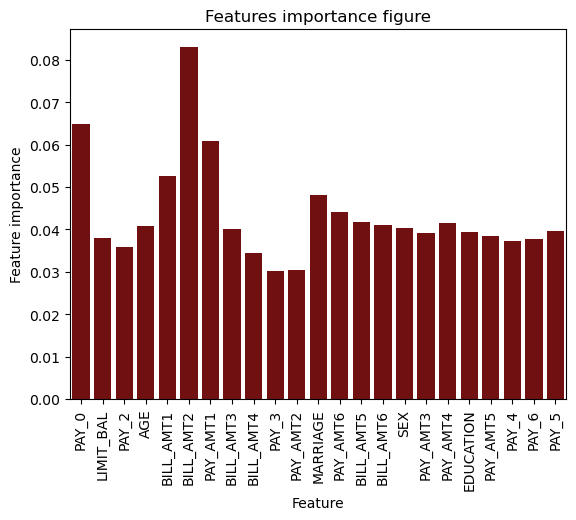

In [166]:
features = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

target = final_sampled_data['default payment next month']

X = final_sampled_data.drop(['default payment next month'], axis=1)
y = final_sampled_data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X_train[features], y_train.values)
temp_df = pd.DataFrame({'Feature': features, 'Feature importance': extra_tree.feature_importances_})
plt.figure()
plt.title('Features importance figure')
plot = sns.barplot(x='Feature',y='Feature importance',data=temp_df,color='maroon')
plot.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 